Predicción del rendimiento académico usando Redes Neuronales

In [29]:
#------------1.Importamos las bibliotecas necesarias
# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# De scikit-learn para procesamiento de datos y evaluación
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Usamos MLPRegressor como Red Neuronal
from sklearn.neural_network import MLPRegressor

1. Cargamos el Data Set

In [30]:
#------------2. Leemos y preparamos los datos
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('student_habits_performance.csv')

# Mostrar las primeras filas del dataframe para entender la estructura
#df.head() #Si esta al final de la celda asi se pinta
print(df.head())

# Ver información sobre el dataframe (tipos de datos, valores nulos, etc.)
df.info()


  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average  

2. Leemos y preparamos los datos del Data Set

In [31]:
# Rellenamos los valores faltantes en la columna 'parental_education_level' con el valor más frecuente
# Hacemos esto porque el dataset no puede tener columnas vacias a la hora de procesarse
df['parental_education_level'] = df['parental_education_level'].fillna(df['parental_education_level'].mode()[0])

# Aseguramos que no haya más valores nulos
print(df.isna().sum())

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64


3. Preprocesamos las Variables Categóricas

In [32]:
# Mapeamos las variables categóricas que puede tener un orden a valores numéricos (Le das un numero mayor cuanto mas importante sea el parametro)
diet_quality = {'Poor': 0, 'Fair': 1, 'Good': 2}
parental_education_level = {'High School': 0, 'Bachelor': 1, 'Master': 2}
internet_quality = {'Poor': 0, 'Average': 1, 'Good': 2}

# Creamos las nuevas columnas codificadas numéricamente
df['dq_e'] = df['diet_quality'].map(diet_quality)
df['pel_e'] = df['parental_education_level'].map(parental_education_level)
df['iq_e'] = df['internet_quality'].map(internet_quality)

# Convertimos las variables categóricas restantes usando get_dummies
#Como son variables categoricas que no se pueden ordenar, las transformamos en variables numericas con One hot-encoding
dummies = pd.get_dummies(df[['gender', 'part_time_job', 'extracurricular_participation']], drop_first=True) #One hot encoding

# Concatenamos las variables categóricas procesadas con el dataframe original
df2 = pd.concat([df, dummies], axis=1)

# Eliminamos las columnas originales de texto ya procesadas
df2 = df2.drop(['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation', 'student_id'], axis=1) 

# Verificamos las primeras filas del dataframe procesado
print(df2.head())

   age  study_hours_per_day  social_media_hours  netflix_hours  \
0   23                  0.0                 1.2            1.1   
1   20                  6.9                 2.8            2.3   
2   21                  1.4                 3.1            1.3   
3   23                  1.0                 3.9            1.0   
4   19                  5.0                 4.4            0.5   

   attendance_percentage  sleep_hours  exercise_frequency  \
0                   85.0          8.0                   6   
1                   97.3          4.6                   6   
2                   94.8          8.0                   1   
3                   71.0          9.2                   4   
4                   90.9          4.9                   3   

   mental_health_rating  exam_score  dq_e  pel_e  iq_e  gender_Male  \
0                     8        56.2     1      2     1        False   
1                     8       100.0     2      0     1        False   
2                     1

4. Buscamos una Correlacion de las variables numericas

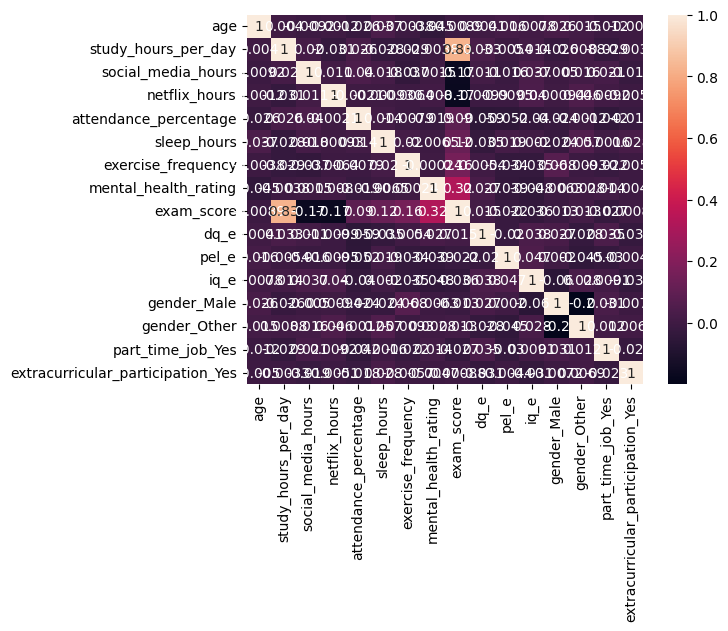

In [33]:
# Calculamos la matriz de correlación
corr = df2.corr()

# Visualizamos la matriz de correlación con un mapa de calor
sns.heatmap(corr, annot=True)
plt.show()

5.Dividimos los datos en conjuntos de entrenamiento y prueba

In [34]:
# Definimos X (características) y y (etiqueta)
X = df2.drop('exam_score', axis=1)
y = df2['exam_score']

# Dividimos los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificamos las dimensiones de los conjuntos
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(800, 15) (200, 15) (800,) (200,)


6. Estandarizamos los datos

In [35]:
# Estandarizamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificamos las dimensiones después de la estandarización
print(X_train_scaled.shape, X_test_scaled.shape)

(800, 15) (200, 15)


7.Creamos la Red Neuronal con MLPRegressor o MLPClassifier

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# Creamos el modelo de red neuronal con MLPRegressor de scikit-learn
#Hiperparametros para mejorar su salida
#En activation (relu, tanh o leaky_relu)
#En hidden_layer_sizes valores como (64, 32, 16), (128, 64), etc.
#learning_rate_init: controla cuánto aprende el modelo. Prueba valores como 0.01, 0.001, 0.0001.
#Usamos early_stopping=True, para evitar sobreentrenamiento.
model = MLPRegressor(hidden_layer_sizes=(256, 128, 64, 32), activation='relu', solver='adam',learning_rate_init=0.01, max_iter=1000,early_stopping=True, random_state=42)

# Entrenamos el modelo
model.fit(X_train_scaled, y_train)

#No usamos el KFold porque da un resultado menor que el que tenemos con el Regresor normal
'''
# KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# --- RMSE (usando MSE negativo y luego raíz cuadrada)
neg_mse_scores = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-neg_mse_scores)

# --- R²
r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='r2')

# Resultados
print("\n--- Validación Cruzada (K-Fold 5) ---")
print(f"R² por fold: {r2_scores}")
print(f"R² promedio: {r2_scores.mean():.3f}")
print(f"RMSE por fold: {rmse_scores}")
print(f"RMSE promedio: {rmse_scores.mean():.2f}")
'''


'\n# KFold\nkfold = KFold(n_splits=5, shuffle=True, random_state=42)\n\n# --- RMSE (usando MSE negativo y luego raíz cuadrada)\nneg_mse_scores = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring=\'neg_mean_squared_error\')\nrmse_scores = np.sqrt(-neg_mse_scores)\n\n# --- R²\nr2_scores = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring=\'r2\')\n\n# Resultados\nprint("\n--- Validación Cruzada (K-Fold 5) ---")\nprint(f"R² por fold: {r2_scores}")\nprint(f"R² promedio: {r2_scores.mean():.3f}")\nprint(f"RMSE por fold: {rmse_scores}")\nprint(f"RMSE promedio: {rmse_scores.mean():.2f}")\n'

8. Evaluamos el modelo

In [37]:
# Realizamos predicciones
y_pred = model.predict(X_test_scaled)

# Calculamos R² y RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Mostramos los resultados
print(f"Red Neuronal → R²: {r2:.3f}, RMSE: {rmse:.2f}")

Red Neuronal → R²: 0.880, RMSE: 5.54
